About Dataset
This dataset is having the data of 1K+ Amazon Product's Ratings and Reviews as per their details listed on the official website of Amazon

Features

product_id - Product ID
product_name - Name of the Product
category - Category of the Product
discounted_price - Discounted Price of the Product
actual_price - Actual Price of the Product
discount_percentage - Percentage of Discount for the Product
rating - Rating of the Product
rating_count - Number of people who voted for the Amazon rating
about_product - Description about the Product
user_id - ID of the user who wrote review for the Product
user_name - Name of the user who wrote review for the Product
review_id - ID of the user review
review_title - Short review
review_content - Long review
img_link - Image Link of the Product
product_link - Official Website Link of the Product
Inspiration

Amazon is an American Tech Multi-National Company whose business interests include E-commerce, where they buy and store the inventory, and take care of everything from shipping and pricing to customer service and returns. I've created this dataset so that people can play with this dataset and do a lot of things as mentioned below

Dataset Walkthrough
Understanding Dataset Hierarchy
Data Preprocessing
Exploratory Data Analysis
Data Visualization
Making Recommendation System
This is a list of some of that things that you can do on this dataset. It's not definitely limited to the one that is mentioned there but a lot more other things can also be done.

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
from plotly.subplots import make_subplots
from scipy.stats import chi2_contingency
from itertools import combinations
%matplotlib inline

In [83]:
# Ignore seaborn infinity handling warning
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

**Data Loading and Exploration**

In [85]:
stocks = pd.read_csv('/Users/shrutiraj/Downloads/amazon.csv')
stocks.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [86]:
# Getting the shape of the data
print(f'The dataframe has {stocks.shape[0]} columns and {stocks.shape[1]} rows.')

The dataframe has 1465 columns and 16 rows.


**Data Cleaning And Preparation**

In [88]:
# Check the current dtype of the columns
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [89]:
# Clean the discounted_price column and change the dtype to float
stocks['discounted_price'] = stocks['discounted_price'].str.replace('₹', '')
stocks['discounted_price'] = stocks['discounted_price'].str.replace(',', '')
stocks['discounted_price'] = stocks['discounted_price'].astype('float64')
stocks['discounted_price'].head()

0    399.0
1    199.0
2    199.0
3    329.0
4    154.0
Name: discounted_price, dtype: float64

In [90]:
# Clean the actual_price column and change the dtype to float
stocks['actual_price'] = stocks['actual_price'].str.replace('₹', '')
stocks['actual_price'] = stocks['actual_price'].str.replace(',', '')
stocks['actual_price'] = stocks['actual_price'].astype('float64')
stocks['actual_price'].head()

0    1099.0
1     349.0
2    1899.0
3     699.0
4     399.0
Name: actual_price, dtype: float64

In [91]:
# Clean the discount_percentage column and change the dtype to float
stocks['discount_percentage'] = stocks['discount_percentage'].str.replace('%', '')
stocks['discount_percentage'] = stocks['discount_percentage'].astype('float64') / 100
stocks['discount_percentage'].head()

0    0.64
1    0.43
2    0.90
3    0.53
4    0.61
Name: discount_percentage, dtype: float64

In [92]:
# Clean the rating_count column and change the dtype to float
stocks['rating_count'] = stocks['rating_count'].str.replace(',', '')
stocks['rating_count'] = stocks['rating_count'].astype('float64')
stocks['rating_count'].head()

0    24269.0
1    43994.0
2     7928.0
3    94363.0
4    16905.0
Name: rating_count, dtype: float64

In [93]:
# Preview of the cleaned dataframe
stocks.head(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...


In [94]:
# Check the rating column values
stocks['rating'].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [95]:
# Preview the row where the rating value doesn't correspond
stocks.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992.0,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [96]:
# Get the rating from the provided link
stocks.query('rating == "|"')['product_link'].values

array(['https://www.amazon.in/Eureka-Forbes-Vacuum-Cleaner-Washable/dp/B08L12N5H1/ref=sr_1_295?qid=1672923607&s=kitchen&sr=1-295'],
      dtype=object)

In the provided Amazon product link we get the rating of 3.9

***Eureka Forbes car Vac 100 Watts powerful suction vacuum cleaner with washable HEPA filter, 3 accessories,compact,light weight & easy to use (Black and
Red)***

In [99]:
# Check the value to the corresponding rating
stocks.loc[stocks['rating'] == "|", "rating"] = "3.9"

In [100]:
# Change the type of the column to float
stocks['rating'] = stocks['rating'].astype('float64')
stocks['rating'].head()

0    4.2
1    4.0
2    3.9
3    4.2
4    4.2
Name: rating, dtype: float64

In [101]:
# Change the category column from object to category type
stocks['category'] = stocks['category'].astype('category')
stocks['category'].head()

0    Computers&Accessories|Accessories&Peripherals|...
1    Computers&Accessories|Accessories&Peripherals|...
2    Computers&Accessories|Accessories&Peripherals|...
3    Computers&Accessories|Accessories&Peripherals|...
4    Computers&Accessories|Accessories&Peripherals|...
Name: category, dtype: category
Categories (211, object): ['Car&Motorbike|CarAccessories|InteriorAccessor..., 'Computers&Accessories|Accessories&Peripherals..., 'Computers&Accessories|Accessories&Peripherals..., 'Computers&Accessories|Accessories&Peripherals..., ..., 'OfficeProducts|OfficePaperProducts|Paper|Stat..., 'OfficeProducts|OfficePaperProducts|Paper|Stat..., 'OfficeProducts|OfficePaperProducts|Paper|Stat..., 'Toys&Games|Arts&Crafts|Drawing&PaintingSuppli...]

***Dealing with Missing Values***

In [103]:
# Check if the is any missing values
stocks.isna().any().any()

True

In [104]:
stocks.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

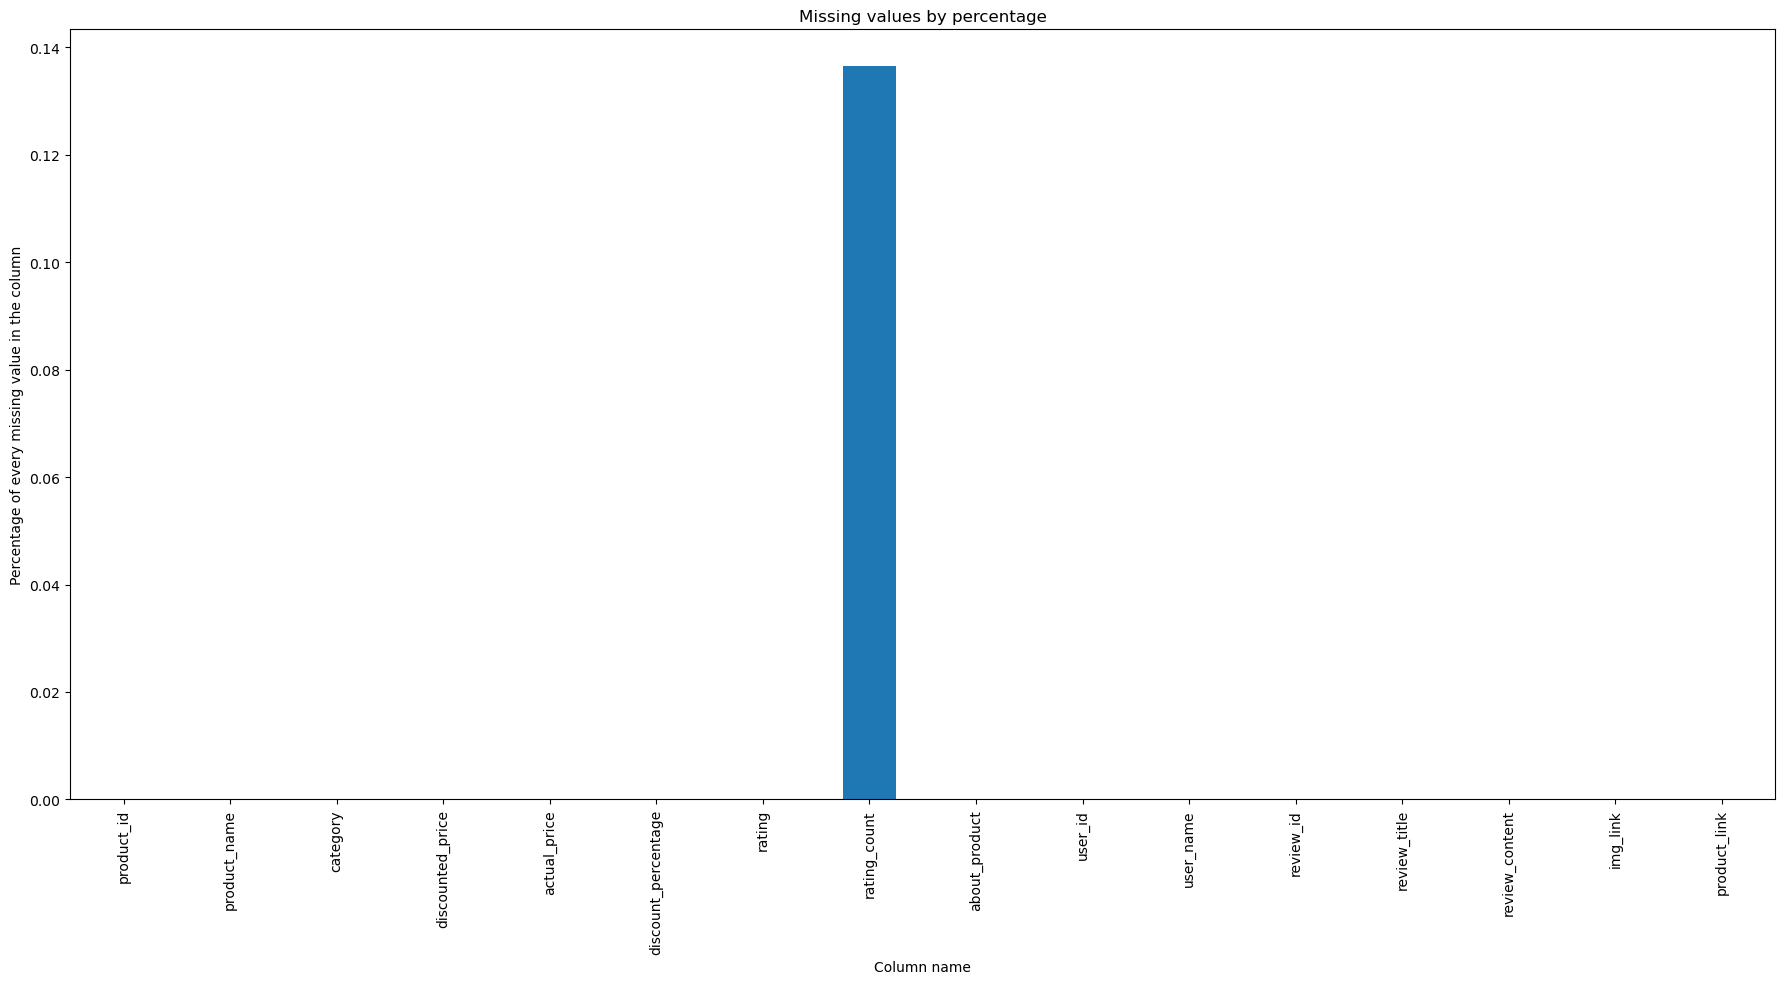

In [105]:
# Visualize the missing values by percentage
plt.figure(figsize=(22, 10))

null_stocks_perc = stocks.isna().sum() / len(stocks) * 100
null_stocks_perc.plot(kind='bar')

plt.xlabel('Column name')
plt.ylabel('Percentage of every missing value in the column')
plt.title('Missing values by percentage')
plt.show()

In [106]:
# Fill the missing values
stocks['rating_count'] = stocks['rating_count'].fillna(value=stocks['rating_count'].median())

In [107]:
# Check for missing values after the fill
stocks.isna().any().any()

False

**Dealing with Duplicate Rows**

In [109]:
# Check for duplicates
stocks.duplicated().any()

False

**Exploritory Data Analysis**

In [111]:
# initialize static color scale for plotly
scale = 'plasma'

In [112]:
#  Shorten the names of categories for easier readability
stocks['cat_short'] = (
    stocks['category']
     .apply(
         lambda x: 
         ''.join(
             f"{''.join(chr for chr in char if chr.isupper())}|" 
             for char in x.split('|')
        )[:-1]
    )
    .astype('category')
)

# Compare the two versions of category name
stocks[['category', 'cat_short']].head(20)

,category,cat_short
0,Computers&Accessories|Accessories&Peripherals|...,CA|AP|CA|C|USBC
1,Computers&Accessories|Accessories&Peripherals|...,CA|AP|CA|C|USBC
2,Computers&Accessories|Accessories&Peripherals|...,CA|AP|CA|C|USBC
3,Computers&Accessories|Accessories&Peripherals|...,CA|AP|CA|C|USBC
4,Computers&Accessories|Accessories&Peripherals|...,CA|AP|CA|C|USBC
5,Computers&Accessories|Accessories&Peripherals|...,CA|AP|CA|C|USBC
6,Computers&Accessories|Accessories&Peripherals|...,CA|AP|CA|C|USBC
7,Computers&Accessories|Accessories&Peripherals|...,CA|AP|CA|C|USBC
8,Computers&Accessories|NetworkingDevices|Networ...,CA|ND|NA|WUSBA
9,Computers&Accessories|Accessories&Peripherals|...,CA|AP|CA|C|USBC


In [113]:
# Create price columns in USD currency
stocks['actual_price_usd'] = round(stocks['actual_price'] * 0.012, 2)
stocks['discounted_price_usd'] = (
    stocks.apply(
            lambda x: round(x['actual_price_usd'] - (x['actual_price_usd'] * x['discount_percentage']), 2),
            axis=1
        )              
)

stocks[['actual_price_usd', 'discounted_price_usd', 'discount_percentage']].head()

,actual_price_usd,discounted_price_usd,discount_percentage
0,13.19,4.75,0.64
1,4.19,2.39,0.43
2,22.79,2.28,0.90
3,8.39,3.94,0.53
4,4.79,1.87,0.61


**Data Correlation**

In [115]:
# Create function to perform chi-square test
def chi_square_test(col1, col2):
    # Create a contingency table
    contingency_table = pd.crosstab(stocks[col1], stocks[col2])
    
    # Perform chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    return chi2, p

# Get the categorical columns of the dataframe
categorical_columns = stocks.select_dtypes(include=['object', 'category']).columns

# Variable for storing test results
results = []

# Perform chi-square test on every column
for col1, col2 in combinations(categorical_columns, 2):
    chi2, p = chi_square_test(col1, col2)
    results.append(
        {
            'col_1': col1, 
            'col_2': col2, 
            'chi2_statistic': chi2, 
            'p_value': p
        }
    )

# Create dataframe from provided results
results_df = pd.DataFrame(results)

# Create a column for segnificance check for every pair
results_df['association'] = 'Not Segnificant'
results_df.loc[results_df['p_value'] < 0.05, 'association'] = 'Segnificant' # Locate the rows where the p-value is low
results_df.set_index(['col_1', 'col_2'], inplace=True) # Set a sequence of indexes for easier readability
results_df.head(20) # Preview the created dataframe

chi2_statistic        p_value      association
col_1        col_2                                                         
product_id   product_name      1.957240e+06   0.000000e+00      Segnificant
             category          3.076500e+05  4.571659e-214      Segnificant
             about_product     1.887408e+06   0.000000e+00      Segnificant
             user_id           1.736941e+06   0.000000e+00      Segnificant
             user_name         1.736941e+06   0.000000e+00      Segnificant
             review_id         1.736941e+06   0.000000e+00      Segnificant
             review_title      1.736941e+06   0.000000e+00      Segnificant
             review_content    1.751123e+06   0.000000e+00      Segnificant
             img_link          1.941003e+06   5.786066e-76      Segnificant
             product_link      1.977750e+06   2.485059e-01  Not Segnificant
             cat_short         3.017900e+05  4.915415e-210      Segnificant
product_name category          3.076500e+05  1.246096e-269      Segnificant
             about_product     1.878618e+06   0.000000e+00      Segnificant
             user_id           1.735109e+06   0.000000e+00      Segnificant
             user_name         1.735109e+06   0.000000e+00      Segnificant
             review_id         1.735109e+06   0.000000e+00      Segnificant
             review_title      1.735109e+06   0.000000e+00      Segnificant
             review_content    1.749291e+06   0.000000e+00      Segnificant
             img_link          1.927818e+06  4.983998e-106      Segnificant
             product_link      1.957240e+06   2.496246e-01  Not Segnificant

In [116]:
# Get the numeric columns
numeric_df = stocks.select_dtypes(include='number')
numeric_df.head()

,discounted_price,actual_price,discount_percentage,rating,rating_count,actual_price_usd,discounted_price_usd
0,399.0,1099.0,0.64,4.2,24269.0,13.19,4.75
1,199.0,349.0,0.43,4.0,43994.0,4.19,2.39
2,199.0,1899.0,0.90,3.9,7928.0,22.79,2.28
3,329.0,699.0,0.53,4.2,94363.0,8.39,3.94
4,154.0,399.0,0.61,4.2,16905.0,4.79,1.87


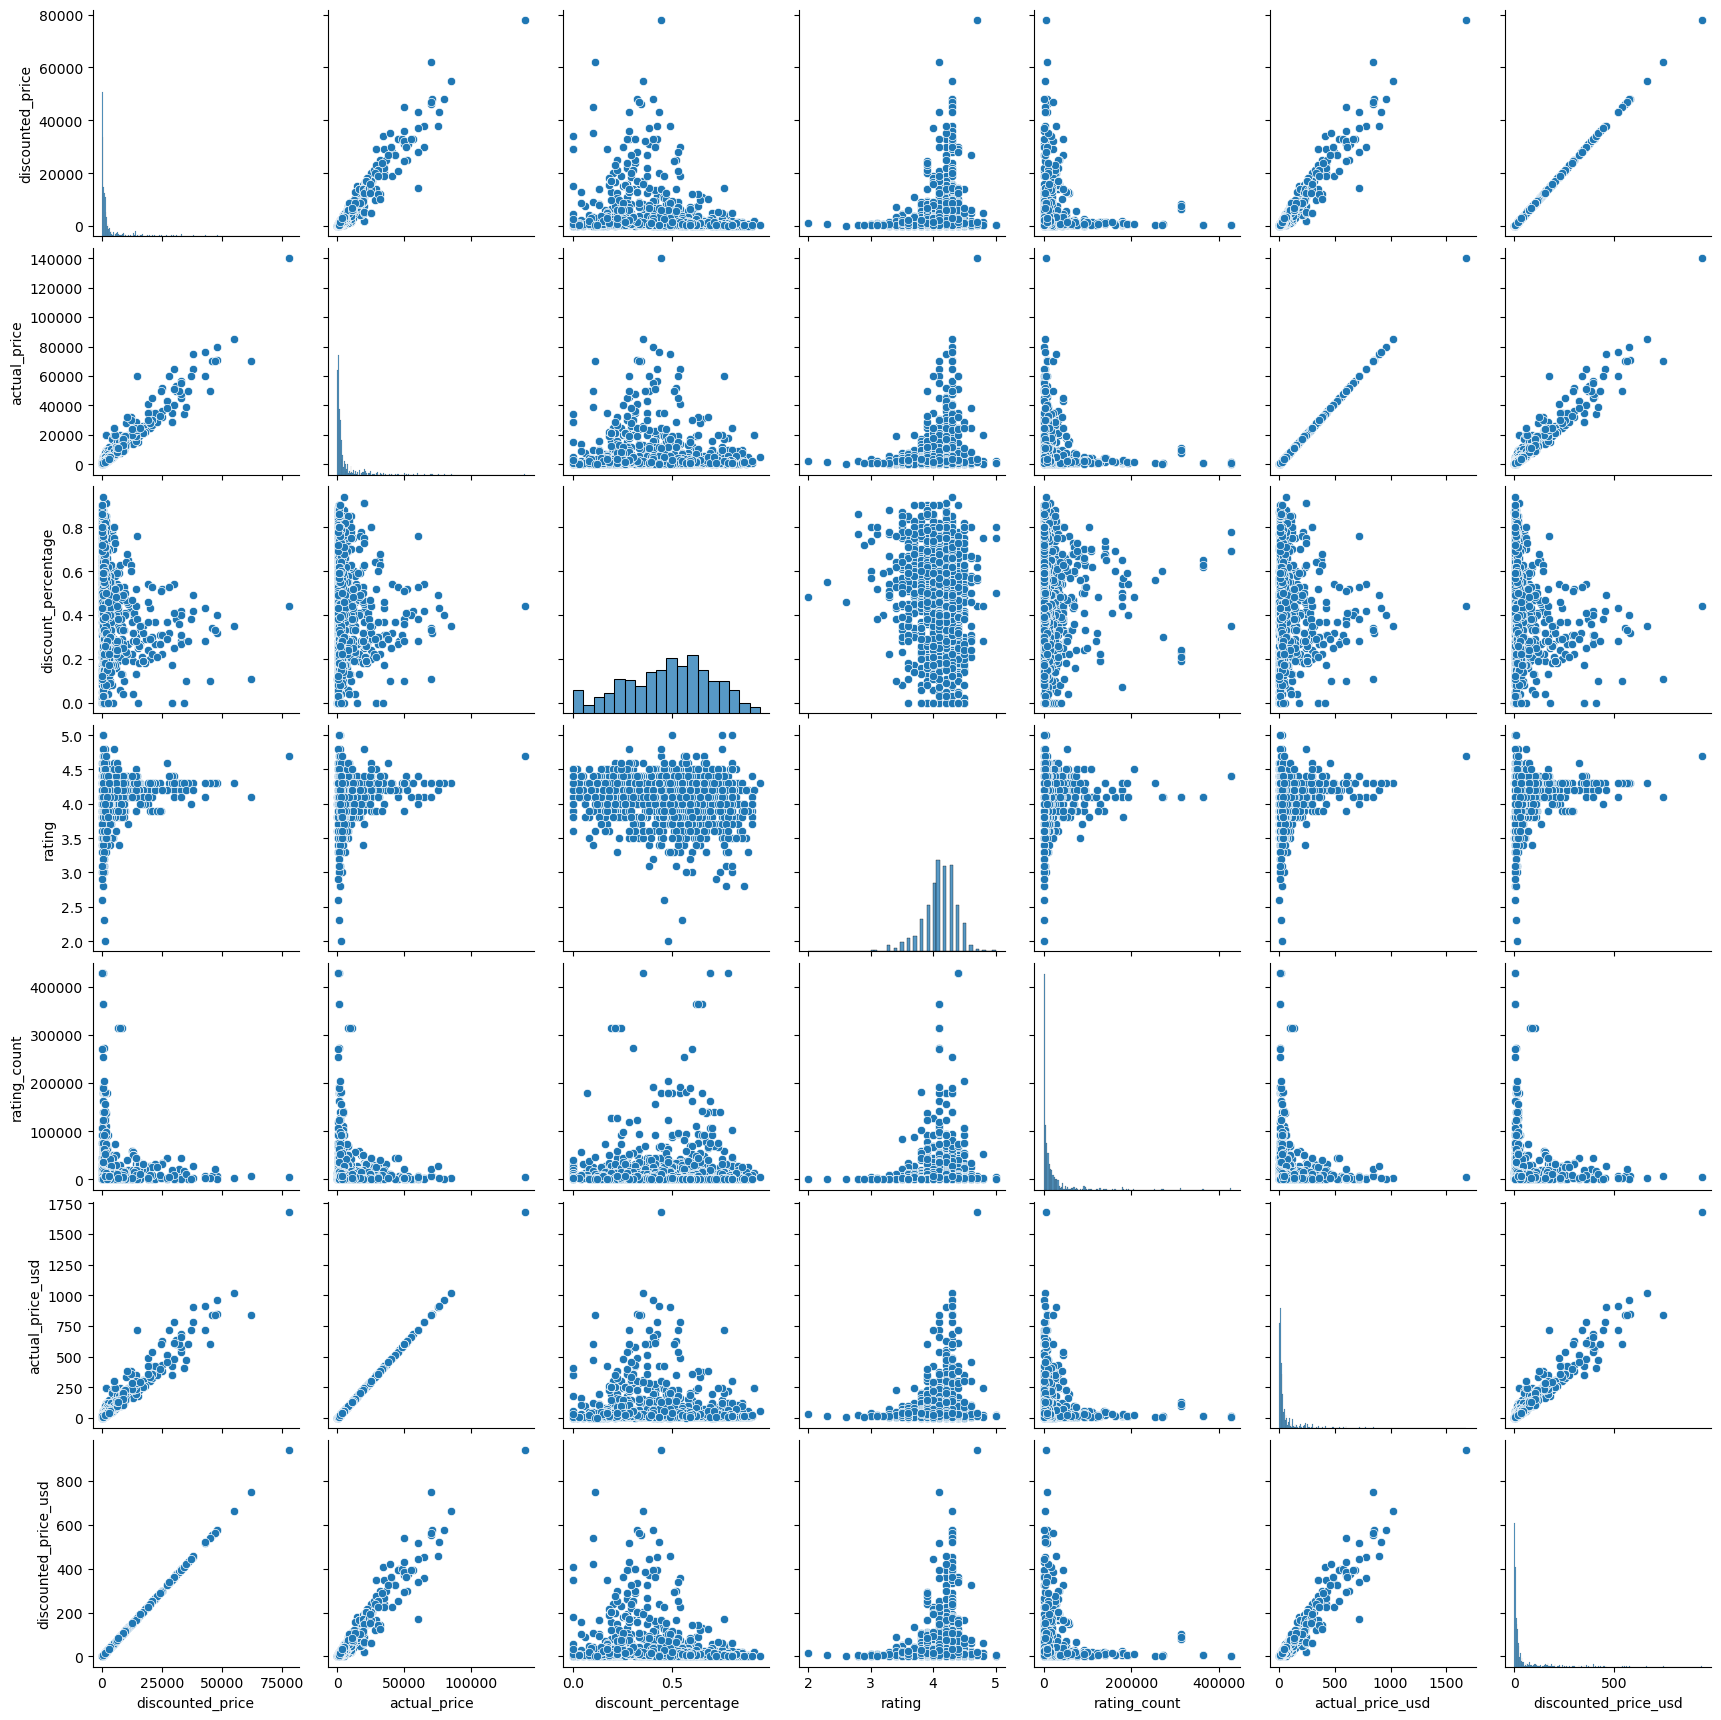

In [117]:
# Create correlation between numeric columns
sns.pairplot(numeric_df)
plt.show()

**CHECKING FOR OUTLIERS**

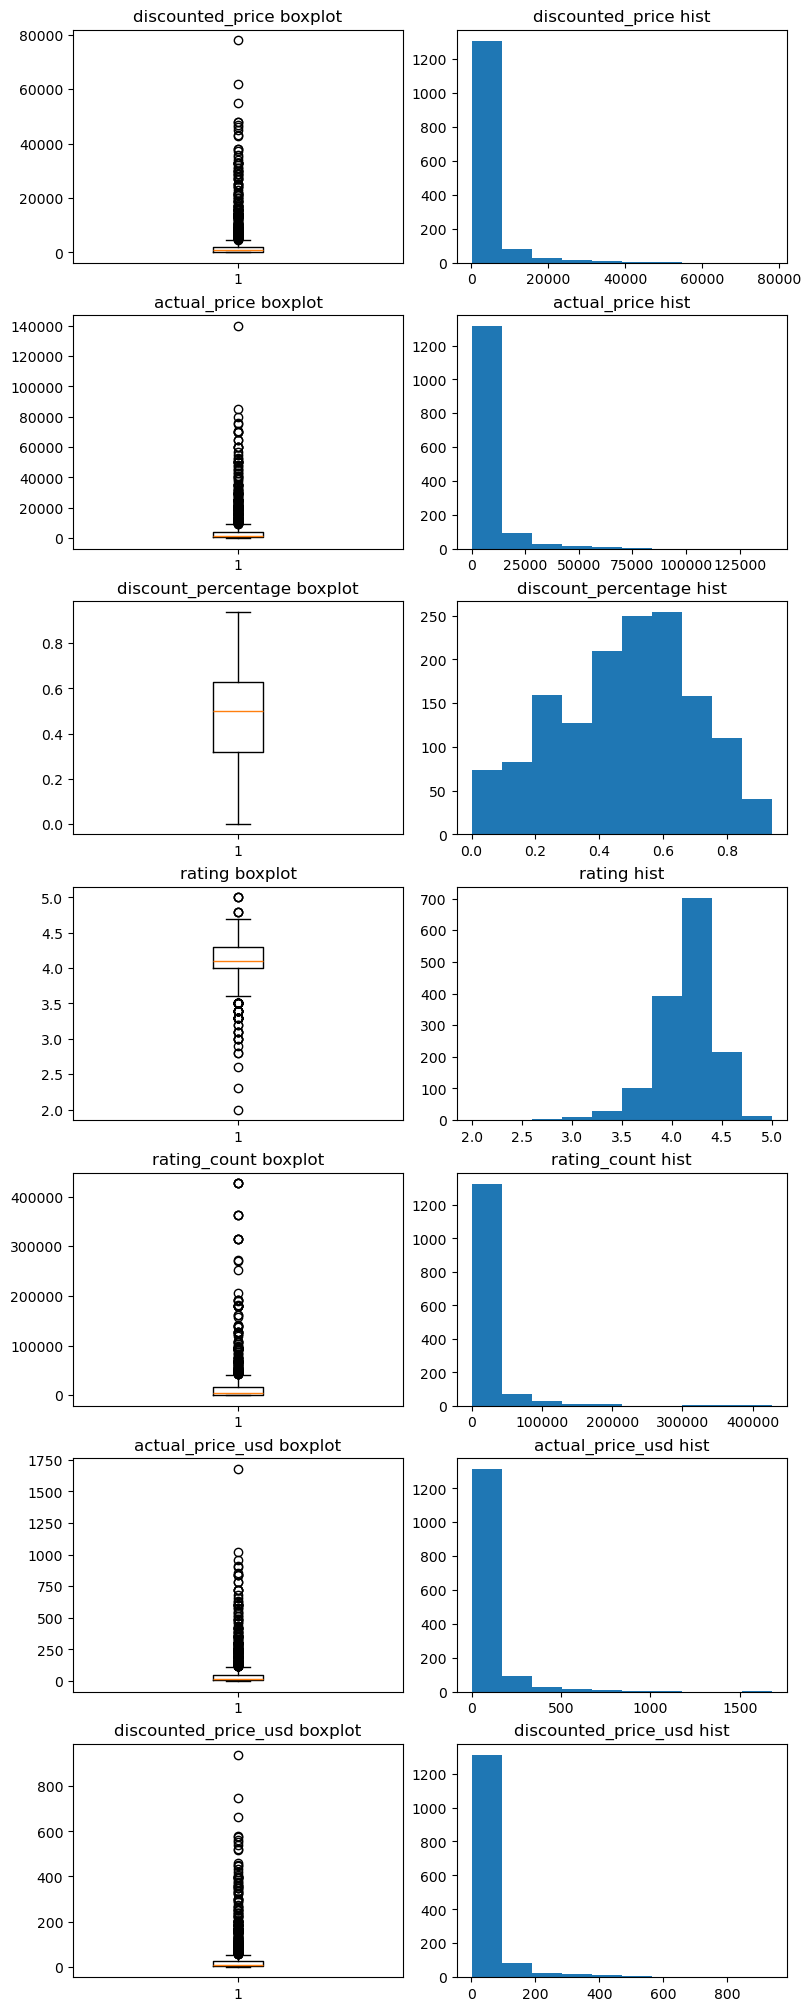

In [119]:
# Create boxplot for every column

fig, axs = (
    plt.subplots(
            nrows=len(numeric_df.columns), 
            ncols=2, 
            layout='constrained', 
            figsize=(8, 20)
    )
)

for idx, name in enumerate(numeric_df.columns):
    axs[idx, 0].boxplot(numeric_df[name])
    axs[idx, 1].hist(numeric_df[name])
    axs[idx, 0].set_title(f'{name} boxplot')
    axs[idx, 1].set_title(f'{name} hist')

plt.show()

As we can see, most of the data is skewed, which explains the huge amount of outliers showed in the boxplots. In the actual_price column one value is standing out.

Let us now visualize the above dataset to derive statictics and conclusions

# most popular categories

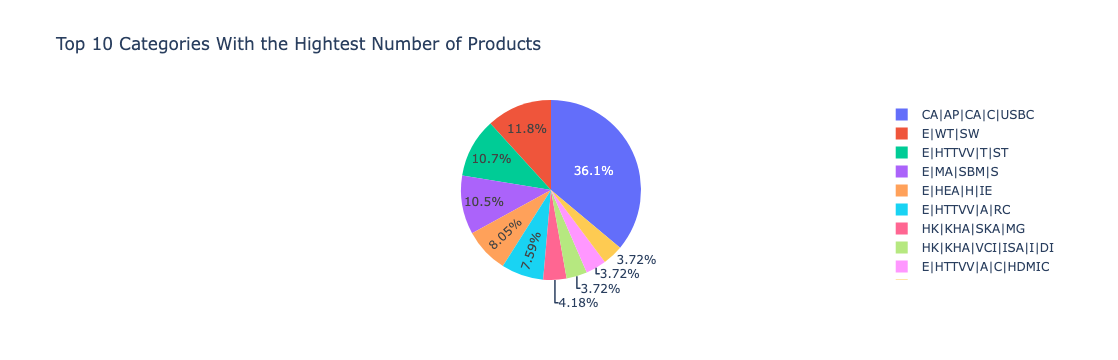

In [123]:
# Get the number of products in every category
cat_count = (
    stocks['cat_short']
        .value_counts()
        .reset_index()
)

# Create a figure
fig = px.pie(
    cat_count.head(10), 
    values='count', 
    names='cat_short',
    title='Top 10 Categories With the Hightest Number of Products',
    labels={
        'cat_short': 'Category of Product',
        'count': 'Product Count'
    }
)

# Show the created graph 
fig.show()

 # average rating of every category

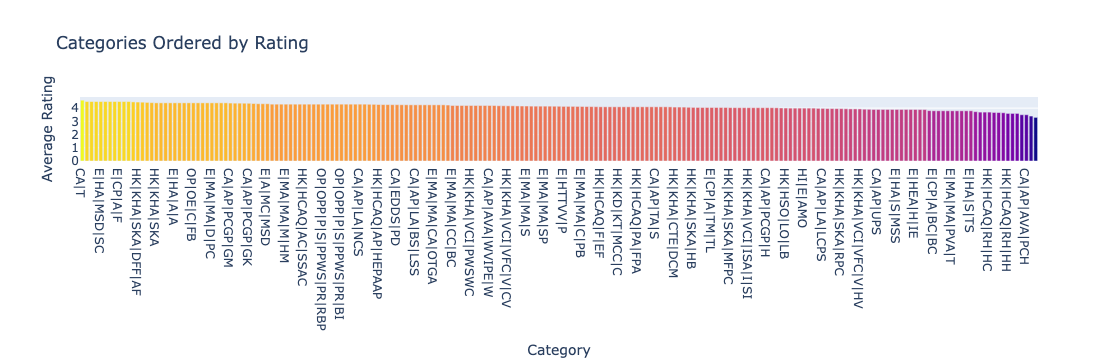

In [125]:
# Create a GroupBy Object for Every Category's Rating
avg_rate = (
    stocks.groupby(
        'cat_short', 
        as_index=False, 
        observed=True
    )['rating']
        .mean()
        .sort_values('rating', ascending=False)
)

# Create the graph object
fig= px.bar(
    avg_rate, 
    x='cat_short', y='rating',
    title='Categories Ordered by Rating',
    color='rating',
    color_continuous_scale=scale,
    labels={
        'rating': 'Average Rating',
        'cat_short': 'Category'
           
    }
)

# Hide the color scale
fig.update_coloraxes(showscale=False)

# Show the created graph
fig.show()

**highest rated categories by rating and rating count**

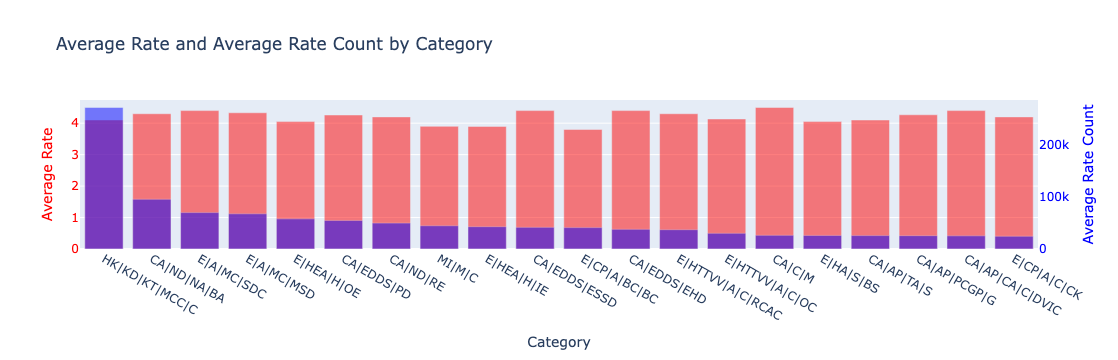

In [127]:
# Get the average rating count per product and it's average rating
avg_rate = (
    stocks.groupby(
        'cat_short', 
        as_index=False,
        observed=True
    )
        .agg(
            avg_rate_count=('rating_count', 'median'),
            avg_rate=('rating', 'mean')
        )
        .sort_values('avg_rate_count', ascending=False)[:20]
)

# Create a seperate bar for average rating count
tr1 = go.Bar(
    x=avg_rate['cat_short'],
    y=avg_rate['avg_rate'],
    name='Average  Rating',
    marker_color='red', 
    yaxis='y1',
    opacity=.5
)

# Create a seperate bar for average rating count
tr2 = go.Bar(
    x=avg_rate['cat_short'],
    y=avg_rate['avg_rate_count'],
    name='Average  Rating Count',
    marker_color='blue',
    yaxis='y2',
    opacity=.5
)

# Combine the two traces in 1 figure
fig = go.Figure(data=[tr1, tr2])

# Update the layout so the figures appear proparly
fig.update_layout(
    title='Average Rate and Average Rate Count by Category',
    xaxis_title='Category',
    yaxis=dict(
        title='Average Rate',
        titlefont=dict(color='red'),
        tickfont=dict(color='red')
    ),
    yaxis2=dict(
        title='Average Rate Count',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue'),
        overlaying='y',
        side='right'
    ),
    barmode='group',
    yaxis2_showgrid=False,
    showlegend=False
)

# Show the created graph
fig.show()

**heighest rated product by rating and rating_count in every category**

In [162]:
# Get the index of the products
idx_list = (
    stocks.groupby('cat_short', observed=True)['rating']
    .nlargest(1)
    .reset_index()['level_1']
)

# Locate the corresponding products
stocks.iloc[idx_list, [1, 16, 4]]

,product_name,cat_short,actual_price
906,Hp Wired On Ear Headphones With Mic With 3.5 M...,CA|AP|AVA|PCH,999.0
748,JBL Commercial CSLM20B Auxiliary Omnidirection...,CA|AP|AVA|PCM,2000.0
936,ZEBRONICS Zeb-Warrior II 10 watts 2.0 Multimed...,CA|AP|AVA|PCS,1300.0
794,Logitech C270 Digital HD Webcam with Widescree...,CA|AP|AVA|WVIPE|W,2595.0
695,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",CA|AP|A|USBUSBA,4999.0
...,...,...,...
616,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,OP|OPP|P|S|PPWS|PR|GIRP,50.0
1004,Parker Moments Vector Timecheck Gold Trim Roll...,OP|OPP|P|S|PPWS|PR|LIRP,420.0
765,Parker Classic Gold Gold Trim Ball Pen,OP|OPP|P|S|PPWS|PR|RBP,600.0
955,Parker Vector Camouflage Gift Set - Roller Bal...,OP|OPP|P|S|PPWS|PR|SBP,450.0


**top 10 lowest average prices based of the 10 cheapest products per category**

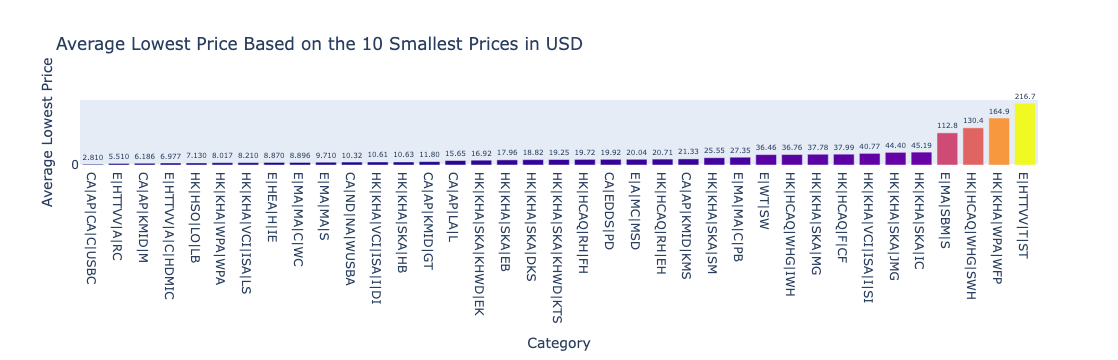

In [165]:
# Get the categoties which have 10 smallest products
cheapest_products_cat = (
    stocks.groupby('category', observed=True)['actual_price'].nsmallest(10)
        .reset_index()
        .groupby(
            'category', 
            as_index=False, 
            observed=True
        )['actual_price'].count()
        .sort_values('actual_price', ascending=False)
        .query('actual_price == 10')['category']
        .to_list()
)


# Get only the products from the provided categories
avg_low_price = (
    stocks.query('category == @cheapest_products_cat')
        .groupby('cat_short', observed=True)['actual_price_usd'].nsmallest(10)
        .reset_index()
        .groupby(
            'cat_short', 
            as_index=False, 
            observed=True
        )
        .agg(
            avg_price=('actual_price_usd', 'mean')
        )
        .sort_values('avg_price')
)

# Create graph
fig = px.bar(
    avg_low_price, 
    x='cat_short', 
    y='avg_price',
    title='Average Lowest Price Based on the 10 Smallest Prices in USD',
    labels={
        'cat_short': 'Category',
        'avg_price': 'Average Lowest Price'
    },
    text_auto='.4s',
    color='avg_price',
    color_continuous_scale=scale
)

# Show the values on top of bars
fig.update_traces(
    textfont_size=12, 
    textangle=0, 
    textposition='outside', 
    cliponaxis=False
)

# Update the layout of the graph
fig.update_layout(
    height=700,
    yaxis = dict(
        tickmode = 'array',
        tickvals = [0, 5000, 10000, 15000],
        ticktext = ['0', '5k', '10k', '15k']
    )
)

# Hide the color scale
fig.update_coloraxes(showscale=False)

# Show the created graph
fig.show()

**correlation between actual_price and discounted_price**

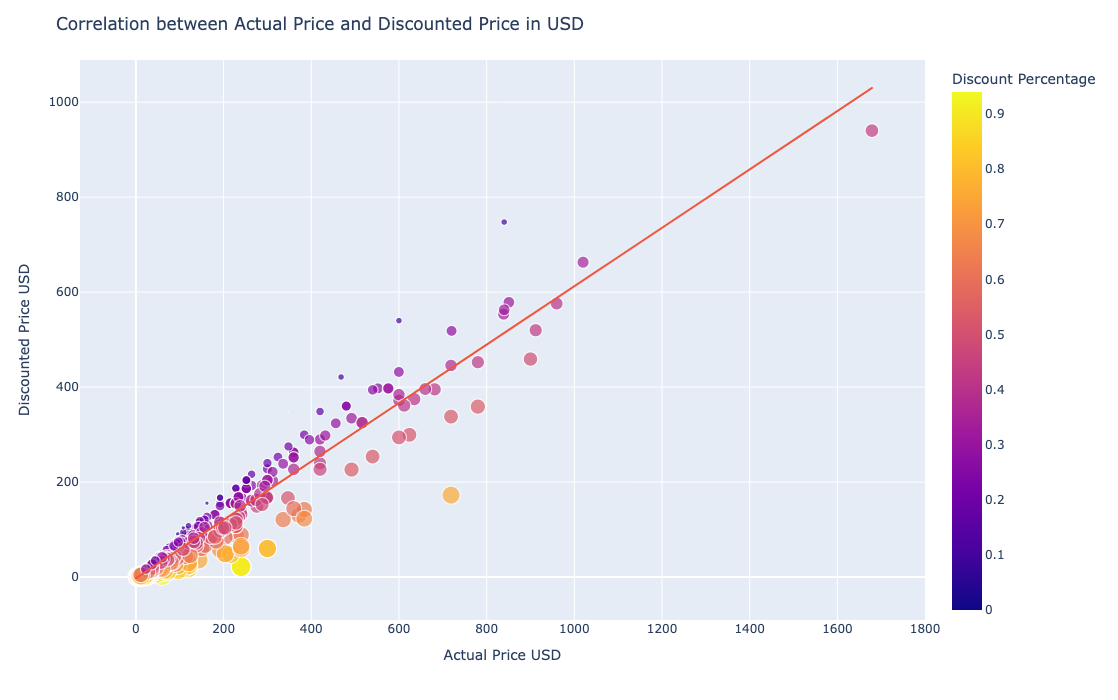

In [168]:
# Create scatter plot figure
fig = px.scatter(
    stocks, 
    x='actual_price_usd', 
    y='discounted_price_usd',
    trendline='ols',
    color='discount_percentage',
    color_continuous_scale=scale,
    size='discount_percentage',
    hover_data=['category'],
    labels={
        'actual_price_usd': 'Actual Price USD',
        'discounted_price_usd': 'Discounted Price USD',
        'discount_percentage': 'Discount Percentage'
    }
)

# Update figure's layout
fig.update_layout(
    height=700,
    title='Correlation between Actual Price and Discounted Price in USD',
)

# Show created scatter plot
fig.show()

**price distribution of the top 10 most expensive categories by average price**

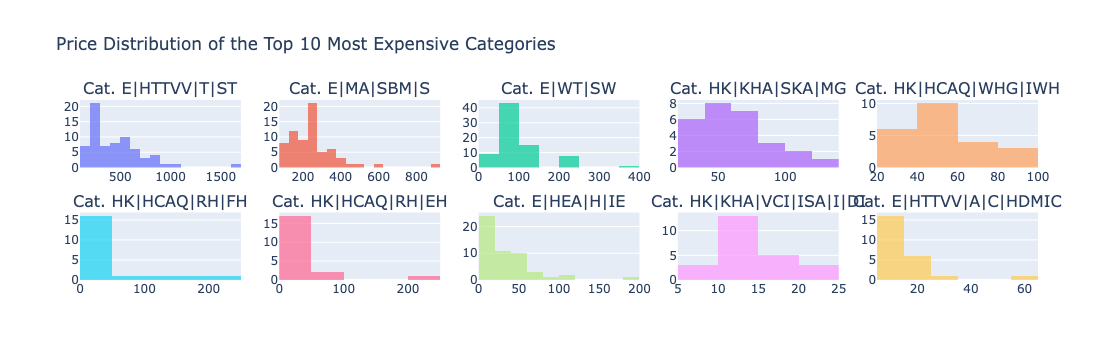

In [173]:
# Get the categories the count products is at least 20
cat = (
    stocks.groupby(
        'category', 
        as_index=False, 
        observed=True
    )['cat_short'].count()
        .sort_values('cat_short', ascending=False)
        .query('cat_short >= 20')['category']
        .to_list()
)

# Get the 10 most expensive groups
top_exp = (
    stocks.query('category == @cat')
        .groupby(
            'cat_short', 
            as_index=False, 
            observed=True
        )['actual_price_usd'].mean()
        .sort_values('actual_price_usd', ascending=False)[:10]['cat_short']
        .to_list()
)

# Create subplots
fig = make_subplots(rows=2, cols=5, subplot_titles=[f'Cat. {name}' for name in top_exp])

row = 1 # Set initial row
col = 1 # Set initial column

# Add trace for every categoty
for idx, cat in enumerate(top_exp):
    if idx == 5:
        row = 2
        col = 1
    
    cat_df = stocks.query('cat_short == @cat')
    
    fig.add_trace(
        go.Histogram(
            x=cat_df['actual_price_usd'], 
            name=f'Cat. {cat}',
            opacity=0.70
        ),
        row=row,
        col=col
    )
    
    col += 1
    
# Update layout
fig.update_layout(
    title_text="Price Distribution of the Top 10 Most Expensive Categories",
    showlegend=False
)
# Show created graph
fig.show()

**price distribution of products by quartiles**

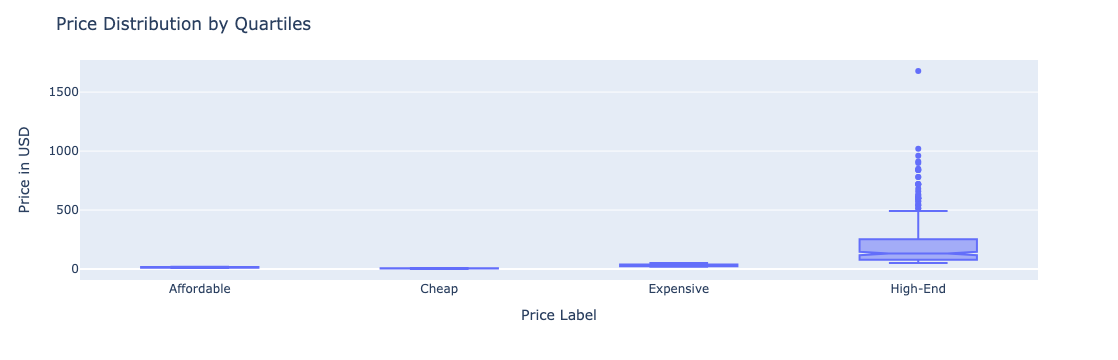

In [176]:
# Label the prices
stocks['price_label'] = (
    pd.qcut(
        stocks['actual_price_usd'], 
        q=4,
        labels=['Cheap', 'Affordable', 'Expensive', 'High-End']
    )
)

# Create boxplot figure
fig = px.box(
    stocks,
    x='price_label',
    y='actual_price_usd',
    labels={
        'actual_price_usd': 'Price in USD',
        'price_label': 'Price Label'
    },
    notched=True
)

# Update layout
fig.update_layout(
    title='Price Distribution by Quartiles'
)

# Show figure
fig.show()